In [1]:
%matplotlib notebook

import arcpy
import os
import sys
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import fiona as f
import scipy
import statsmodels

import geopandas as gp
import mplleaflet
from shapely.geometry import box as shape_box
# from shapely.geometry import Polygon
# import dbf2df as dbf
import gdal
gdal.UseExceptions()
import ogr
import osr
# import pickle
import pandas as pd
# from model_specs import *
# pth = 'MFGrid/mfgrid'
# sys.path.append(pth)
# import grid
from IPython.display import Image
from IPython.display import Math

from __future__ import print_function
import statsmodels.api as sm

from sklearn import linear_model

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from arcpy import env

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

height has been deprecated.



In [2]:
# Set environment settings
env.workspace = r"C:\Local_GIS\Vienna\Tree_soil_correlation"

In [3]:
#Import soil data
soilgas_file = r'C:\Local_GIS\Vienna\Tree_soil_correlation\Vienna_SPS_ft.shp'
soilgas_s = gp.read_file(soilgas_file)

In [4]:
maxbuffer=50

In [5]:
# for x in range(1,maxbuffer+1):
#     try:
#         arcpy.CopyFeatures_management("Vienna_SPS_ft.shp","Vienna_SPS_ft_{}x.shp".format(x))
#     except:
#         pass

In [6]:
# for x in range(1,maxbuffer+1):
#     arcpy.CalculateField_management("Vienna_All_trees_summarized_ft_{}x.shp".format(x),"buffer_fie",'!Average_Tr!*{}/12'.format(x),'PYTHON_9.3')


## Set the list of buffers to create around trees

### Selecting and creating shapefiles for the desired depth intervals of soil gas samples from 0 to 4 ft

In [7]:
# if arcpy.Exists("lyr"):
#     arcpy.Delete_management("lyr")

# for i in range(0,5,1):
#     for x in range(i+1,5,1):
#         arcpy.MakeFeatureLayer_management(soilgas_file, "lyr")
#         arcpy.SelectLayerByAttribute_management("lyr", "ADD_TO_SELECTION", '"Depth" <={} and "Depth" >={}'.format(x,i))
#         arcpy.CopyFeatures_management("lyr", "soilgas_{}to{}ft".format(i,x))

#         if arcpy.Exists("lyr"):
#             arcpy.Delete_management("lyr")

In [8]:
# # Buffer areas of impact around major roads
# if arcpy.Exists("All_trees_summarized_buffer.shp"):
#     arcpy.Delete_management("All_trees_summarized_buffer.shp")

# trees = "All_trees_summarized_ft.shp"
# trees_buffer = r"All_trees_summarized_buffer.shp"
# distanceField = "buffer_fie"
# arcpy.Buffer_analysis(trees, trees_buffer, buffer_distance_or_field=distanceField)


# arcpy.CalculateField_management("All_trees_summarized_ft_10x","buffer_field",'!Average_Tr!*10/12','PYTHON_9.3')
# arcpy.CalculateField_management("All_trees_summarized_ft_20x","buffer_field",'!Average_Tr!*20/12','PYTHON_9.3')
# arcpy.CalculateField_management("All_trees_summarized_ft_40x","buffer_field",'!Average_Tr!*40/12','PYTHON_9.3')

In [9]:
# # Buffer areas of impact around major roads
# for t in buffers:
#     trees = "All_trees_summarized_ft_{}x.shp".format(t)
#     distanceField = "buffer_fie"
#     trees_buffer = r"All_trees_summarized_buffer_{}x.shp".format(t)
#     arcpy.Buffer_analysis(trees, trees_buffer, buffer_distance_or_field=distanceField)

# # trees_10x = "All_trees_summarized_ft_10x.shp"
# # trees_20x = "All_trees_summarized_ft_20x.shp"
# # trees_30x = "All_trees_summarized_ft_30x.shp"
# # trees_40x = "All_trees_summarized_ft_40x.shp"
# # distanceField = "buffer_fie"

# # trees_buffer_10x = r"All_trees_summarized_buffer_10x.shp"
# # trees_buffer_20x = r"All_trees_summarized_buffer_20x.shp"
# # trees_buffer_30x = r"All_trees_summarized_buffer_30x.shp"
# # trees_buffer_40x = r"All_trees_summarized_buffer_40x.shp"

# # # arcpy.Buffer_analysis(trees, trees_buffer, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_10x, trees_buffer_10x, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_30x, trees_buffer_30x, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_20x, trees_buffer_20x, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_40x, trees_buffer_40x, buffer_distance_or_field=distanceField)


In [10]:
# for s in range(1,maxbuffer+1):
#     for i in range(0,5,1):
#         for x in range(i+1,5,1):
#             soilgas_file=r"soilgas_{}to{}ft.shp".format(i,x)
#             outfc = r"C:\Local_GIS\Vienna\Tree_soil_correlation\Soilgas\Tree_soilgas_matches_{}to{}ft_{}x.shp".format(i,x,s)

#             trees_buffer = r"C:\Local_GIS\Vienna\Tree_soil_correlation\Soil\All_trees_summarized_buffer_{}x.shp".format(s)

#             fieldmappings = arcpy.FieldMappings()
#             fieldmappings.addTable(trees_buffer)
#             fieldmappings.addTable(soilgas_file)
#             PCEFieldIndex = fieldmappings.findFieldMapIndex("PCE_ppt")
#             CFCFieldIndex = fieldmappings.findFieldMapIndex("CFC_ppt")
#             fieldmap = fieldmappings.getFieldMap(PCEFieldIndex)
#             fieldmap3 = fieldmappings.getFieldMap(CFCFieldIndex)

#             # Get the output field's properties as a field object
#             field = fieldmap.outputField
#             field3 = fieldmap3.outputField

#             # Rename the field and pass the updated field object back into the field map
#             field.name = "mean_PCE_soil"
#             field.aliasName = "mean_PCE_soil"
#             fieldmap.outputField = field

#             field3.name = "mean_CFC_soil"
#             field3.aliasName = "mean_CFC_soil"
#             fieldmap3.outputField = field3

#             # Set the merge rule to mean and then replace the old fieldmap in the mappings object
#             # with the updated one
#             fieldmap.mergeRule = "mean"
#             fieldmap3.mergeRule = "mean"
#             fieldmappings.replaceFieldMap(PCEFieldIndex, fieldmap)
#             fieldmappings.replaceFieldMap(CFCFieldIndex, fieldmap3)

#             arcpy.SpatialJoin_analysis(trees_buffer, soilgas_file, outfc, "JOIN_ONE_TO_ONE", "KEEP_COMMON", fieldmappings, "CONTAINS")



## Single SLR

In [11]:
# trees_soilgas_matched_file = 'C:\Local_GIS\Vienna\Tree_soil_correlation\Soilgas\Tree_soilgas_matches_2to4ft_10x.shp'
# matched = gp.read_file(trees_soilgas_matched_file)

# soil_file = 'C:\Local_GIS\Vienna\Tree_soil_correlation\soilgas_2to4ft.shp'
# soilgas = gp.read_file(soil_file)

# matched.loc[matched['Average_PC']<=4.7,'Average_PC']=4.7
# matched.loc[matched['mean_PCE_s']<=1,'mean_PCE_s']=np.nan
# # trees_gw_pce.loc[trees_gw_pce['TETRACHL_2']=='U','TETRACHLOR']  = 2
# matched['soil_log_pce'] = np.log(matched['mean_PCE_s'])
# matched['tree_log_pce'] = np.log(matched['Average_PC'])


# # matched.loc[matched['Average_TC']<=7.7,'Average_TC']=7.7
# # # matched.loc[matched['TRICHLOR_2']=='U','TRICHLOROE']  = 2
# # matched.loc[matched['mean_TCE_s']==1,'mean_TCE_s']  = np.nan
# # matched['soil_log_tce'] = np.log(matched['mean_TCE_s'])
# # matched['tree_log_tce'] = np.log(matched['Average_TC'])


# matched.loc[matched['Average_CF']==1,'Average_CF']=np.nan
# matched.loc[matched['mean_CFC_s']==1,'mean_CFC_s']  = np.nan
# matched['soil_log_cfc'] = np.log(matched['mean_CFC_s'])
# matched['tree_log_cfc'] = np.log(matched['Average_CF'])

# # X1 = sm.add_constant(matched.soil_log_cfc)
# # model_cfc = sm.OLS(matched.tree_log_cfc,X1, missing='drop')
# # results_cfc = model_cfc.fit()

# # print(results_cfc.summary())

# # rho_cfc = scipy.stats.spearmanr(matched.soil_log_cfc, matched.tree_log_cfc, nan_policy='omit')
# # print(rho_cfc.pvalue)



# # X2 = sm.add_constant(matched.tree_log_tce)
# # model_tce = sm.OLS(matched.soil_log_tce,X2, missing='drop')
# # results_tce = model_tce.fit()

# # print(results_tce.summary())

# # rho_tce = scipy.stats.spearmanr(matched.soil_log_tce, matched.tree_log_tce, nan_policy='omit')


# X3 = sm.add_constant(matched.soil_log_pce)
# model_pce = sm.OLS(matched.tree_log_pce,X3, missing='drop')
# results_pce = model_pce.fit()

# # print(results_pce.summary())

# # rho_pce = scipy.stats.spearmanr(matched.soil_log_pce, matched.tree_log_pce,nan_policy='omit')


# # ax = soilgas.plot()
# # matched.plot(ax=ax, cmap='Pastel1',alpha=0.01,linewidth=0.1)

# # statsmodels.graphics.regressionplots.plot_regress_exog(results_pce,1)

# fig, ax = plt.subplots()
# ax.scatter(matched.soil_log_pce,matched.tree_log_pce)
# for gw, tree, diam in zip(matched.soil_log_pce, matched.tree_log_pce, matched.Average_Tr):                                       # <--
#     ax.annotate('{}'.format(diam),xy=(gw, tree))
# plt.xlabel('Log GW Concentration')
# plt.ylabel('Log Tree Concentration')
# # plt.plot([0,6],[results_pce.params[0],6*results_pce.params[1]])
    
# plt.show()

# # fig = plt.figure()

# # ax1 = fig.add_subplot(211)
# # plt.title('PCE')
# # plt.ylabel('Log Tree')
# # plt.xlabel('Log Soil')
# # ax1.plot( matched.soil_log_pce,matched.tree_log_pce,linestyle='None', marker='o', markersize=2)
# # # plt.axis('equal')
# # plt.grid('on')
# # plt.plot(range(10),'--')

# # ax2 = fig.add_subplot(212)
# # ax2.plot( results_pce.fittedvalues, results_pce.resid,linestyle='None', marker='o', markersize=2)
# # # plt.axis('equal')
# # plt.grid('on')
# # plt.ylabel('Residual')
# # plt.xlabel('Predicted')


# # ax3 = fig.add_subplot(233)
# # plt.title('TCE')
# # plt.ylabel('Log GW')
# # plt.xlabel('Log Tree')
# # ax3.plot(trees_gw_tce.tree_log_tce, trees_gw_tce.soil_log_tce,linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # # plt.plot(range(10),'--')

# # ax4 = fig.add_subplot(234)
# # ax4.plot(results_tce.resid, results_tce.fittedvalues, linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # plt.ylabel('Predicated')
# # plt.xlabel('Residual')



## Looping the SLR 

In [13]:
Columns=[]
for i in range(0,5,1):
    for x in range(i+1,5,1):
        Columns.append('R2-PCE_{}to{}ft'.format(i,x))
        Columns.append('PCE_c_{}to{}ft'.format(i,x))
        Columns.append('PCE_p_{}to{}ft'.format(i,x))
        Columns.append('PCE_n_{}to{}ft'.format(i,x))
        Columns.append('R2-CFC_{}to{}ft'.format(i,x))
        Columns.append('CFC_c_{}to{}ft'.format(i,x))
        Columns.append('CFC_p_{}to{}ft'.format(i,x))
        Columns.append('CFC_n_{}to{}ft'.format(i,x))
        
Indices=range(0,10,1)

stats_SLR = pd.DataFrame(columns=Columns,index=np.arange(1,maxbuffer+1))

for s in range(1,maxbuffer+1):
    j=1
    for i in range(0,5,1):
        for x in range(i+1,5,1):
            trees_soil_matched = 'C:\Local_GIS\Vienna\Tree_soil_correlation\Soilgas\Tree_soilgas_matches_{}to{}ft_{}x.shp'.format(i,x,s)
            matched = gp.read_file(trees_soil_matched)
            
            try:
                matched.loc[matched['Average_PC']<=0.47,'Average_PC']=0.47
                matched.loc[matched['mean_PCE_s']<=0,'mean_PCE_s']=np.nan
                # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
                matched['soil_log_pce'] = np.log(matched['mean_PCE_s'])
                matched['tree_log_pce'] = np.log(matched['Average_PC'])
            except:
                pass

            try:
                matched.loc[matched['Average_CF']==0,'Average_CF']=np.nan
                matched.loc[matched['mean_CFC_s']==0,'mean_CFC_s']  = np.nan
                matched['soil_log_cfc'] = np.log(matched['mean_CFC_s'])
                matched['tree_log_cfc'] = np.log(matched['Average_CF'])
            except:
                pass
            
            try:
#                 X = matched[['soil_log_pce','Average_Tr']]
#                 X3 = sm.add_constant(X)
                X3 = sm.add_constant(matched.tree_log_pce)
                model_pce = sm.OLS(matched.soil_log_pce,X3, missing='drop')
                results_pce = model_pce.fit()

                stats_SLR.iloc[s-1,(j-1)*8+0]=results_pce.rsquared_adj
                stats_SLR.iloc[s-1,(j-1)*8+1]=results_pce.pvalues.loc['const']
                stats_SLR.iloc[s-1,(j-1)*8+2]=results_pce.pvalues.loc['tree_log_pce']
                stats_SLR.iloc[s-1,(j-1)*8+3]=results_pce.df_resid+2

            except:
                stats_SLR.iloc[s-1,(j-1)*8+0]=np.nan
                stats_SLR.iloc[s-1,(j-1)*8+1]=np.nan
                stats_SLR.iloc[s-1,(j-1)*8+2]=np.nan
                stats_SLR.iloc[s-1,(j-1)*8+3]=np.nan        
                
            try:
#                 X = matched[['soil_log_cfc','Average_Tr']]
#                 X1 = sm.add_constant(X)
                X1 = sm.add_constant(matched.tree_log_cfc)
                model_cfc = sm.OLS(matched.soil_log_cfc,X1, missing='drop')
                results_cfc = model_cfc.fit()

                stats_SLR.iloc[s-1,(j-1)*8+4]=results_cfc.rsquared_adj
                stats_SLR.iloc[s-1,(j-1)*8+5]=results_cfc.pvalues.loc['const']
                stats_SLR.iloc[s-1,(j-1)*8+6]=results_cfc.pvalues.loc['tree_log_cfc']
                stats_SLR.iloc[s-1,(j-1)*8+7]=results_cfc.df_resid+2


            except:
                stats_SLR.iloc[s-1,(j-1)*8+4]=np.nan
                stats_SLR.iloc[s-1,(j-1)*8+5]=np.nan
                stats_SLR.iloc[s-1,(j-1)*8+6]=np.nan
                stats_SLR.iloc[s-1,(j-1)*8+7]=np.nan

            j+=1

        else:
            pass
        
print("Done")


# stats_SLR.to_excel('U:\MST\Vienna\Statistics\Tree_soil_stats_SLR_MLR_aboveMDL.xlsx')



Done


In [14]:
stats_SLR.to_excel('U:\MST\Vienna\Statistics\Tree_soilgas_stats_SLR_All_Buffers.xlsx')

## Looping the MLR 

In [15]:
Columns=[]
for i in range(0,5,1):
    for x in range(i+1,5,1):
        Columns.append('R2-PCE_{}to{}ft'.format(i,x))
        Columns.append('PCE_c_{}to{}ft'.format(i,x))
        Columns.append('PCE_p_{}to{}ft'.format(i,x))
        Columns.append('PCE_p2_{}to{}ft'.format(i,x))
        Columns.append('PCE_n_{}to{}ft'.format(i,x))
        Columns.append('R2-CFC_{}to{}ft'.format(i,x))
        Columns.append('CFC_c_{}to{}ft'.format(i,x))
        Columns.append('CFC_p_{}to{}ft'.format(i,x))
        Columns.append('CFC_p2_{}to{}ft'.format(i,x))
        Columns.append('CFC_n_{}to{}ft'.format(i,x))
        
Indices=range(0,10,1)

stats_MLR = pd.DataFrame(columns=Columns,index=np.arange(1,maxbuffer+1))

for j in range(1,maxbuffer+1):
    s=1
    for i in range(0,5,1):
        for x in range(i+1,5,1):
            trees_soil_matched = 'C:\Local_GIS\Vienna\Tree_soil_correlation\Soilgas\Tree_soilgas_matches_{}to{}ft_{}x.shp'.format(i,x,j)
            matched = gp.read_file(trees_soil_matched)
            
            try:
                matched.loc[matched['Average_PC']<=0.47,'Average_PC']=0.47
                matched.loc[matched['mean_PCE_s']<=0,'mean_PCE_s']=np.nan
                # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
                matched['soil_log_pce'] = np.log(matched['mean_PCE_s'])
                matched['tree_log_pce'] = np.log(matched['Average_PC'])
            except:
                pass

            try:
                matched.loc[matched['Average_TC']<=7.7,'Average_TC']=np.nan
                # matched.loc[matched['TRICHLOR_1']=='U','TRICHLOROE']  = 1
                matched.loc[matched['mean_TCE_s']==0,'mean_TCE_s']  = np.nan
                matched['soil_log_tce'] = np.log(matched['mean_TCE_s'])
                matched['tree_log_tce'] = np.log(matched['Average_TC'])
            except:
                pass
            try:
                matched.loc[matched['Average_CF']==0,'Average_CF']=np.nan
                matched.loc[matched['mean_CFC_s']==0,'mean_CFC_s']  = np.nan
                matched['soil_log_cfc'] = np.log(matched['mean_CFC_s'])
                matched['tree_log_cfc'] = np.log(matched['Average_CF'])
            except:
                pass
            try:
                X = matched[['tree_log_pce','Average_Tr']]
                X3 = sm.add_constant(X)
    #             X3 = sm.add_constant(matched.tree_log_pce)
                model_pce = sm.OLS(matched.soil_log_pce,X3, missing='drop')
                results_pce = model_pce.fit()

                stats_MLR.iloc[j-1,(s-1)*10+0]=results_pce.rsquared_adj
                stats_MLR.iloc[j-1,(s-1)*10+1]=results_pce.pvalues.loc['const']
                stats_MLR.iloc[j-1,(s-1)*10+2]=results_pce.pvalues.loc['tree_log_pce']
                stats_MLR.iloc[j-1,(s-1)*10+3]=results_pce.pvalues.loc['Average_Tr']
                stats_MLR.iloc[j-1,(s-1)*10+4]=results_pce.df_resid+3

            except:
                stats_MLR.iloc[j-1,(s-1)*10+0]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+1]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+2]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+3]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+4]=np.nan
                
            try:
                X = matched[['tree_log_cfc','Average_Tr']]
                X1 = sm.add_constant(X)
    #             X1 = sm.add_constant(matched.tree_log_cfc)
                model_cfc = sm.OLS(matched.soil_log_cfc,X1, missing='drop')
                results_cfc = model_cfc.fit()

                stats_MLR.iloc[j-1,(s-1)*10+5]=results_cfc.rsquared_adj
                stats_MLR.iloc[j-1,(s-1)*10+6]=results_cfc.pvalues.loc['const']
                stats_MLR.iloc[j-1,(s-1)*10+7]=results_cfc.pvalues.loc['tree_log_cfc']
                stats_MLR.iloc[j-1,(s-1)*10+8]=results_cfc.pvalues.loc['Average_Tr']
                stats_MLR.iloc[j-1,(s-1)*10+9]=results_cfc.df_resid+3


            except:
                stats_MLR.iloc[j-1,(s-1)*10+5]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+6]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+7]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+8]=np.nan
                stats_MLR.iloc[j-1,(s-1)*10+9]=np.nan



            s+=1

        else:
            pass
print('Done')

# stats_MLR.to_excel('U:\MST\Vienna\Statistics\Tree_soil_stats_MLR_MLR_aboveMDL.xlsx')



Done


In [23]:
stats_SLR

,R2-PCE_0to1ft,PCE_c_0to1ft,PCE_p_0to1ft,PCE_n_0to1ft,R2-CFC_0to1ft,CFC_c_0to1ft,CFC_p_0to1ft,CFC_n_0to1ft,R2-PCE_0to2ft,PCE_c_0to2ft,PCE_p_0to2ft,PCE_n_0to2ft,R2-CFC_0to2ft,CFC_c_0to2ft,CFC_p_0to2ft,CFC_n_0to2ft,R2-PCE_0to3ft,PCE_c_0to3ft,PCE_p_0to3ft,PCE_n_0to3ft,R2-CFC_0to3ft,CFC_c_0to3ft,CFC_p_0to3ft,CFC_n_0to3ft,R2-PCE_0to4ft,PCE_c_0to4ft,PCE_p_0to4ft,PCE_n_0to4ft,R2-CFC_0to4ft,CFC_c_0to4ft,CFC_p_0to4ft,CFC_n_0to4ft,R2-PCE_1to2ft,PCE_c_1to2ft,PCE_p_1to2ft,PCE_n_1to2ft,R2-CFC_1to2ft,CFC_c_1to2ft,CFC_p_1to2ft,CFC_n_1to2ft,R2-PCE_1to3ft,PCE_c_1to3ft,PCE_p_1to3ft,PCE_n_1to3ft,R2-CFC_1to3ft,CFC_c_1to3ft,CFC_p_1to3ft,CFC_n_1to3ft,R2-PCE_1to4ft,PCE_c_1to4ft,PCE_p_1to4ft,PCE_n_1to4ft,R2-CFC_1to4ft,CFC_c_1to4ft,CFC_p_1to4ft,CFC_n_1to4ft,R2-PCE_2to3ft,PCE_c_2to3ft,PCE_p_2to3ft,PCE_n_2to3ft,R2-CFC_2to3ft,CFC_c_2to3ft,CFC_p_2to3ft,CFC_n_2to3ft,R2-PCE_2to4ft,PCE_c_2to4ft,PCE_p_2to4ft,PCE_n_2to4ft,R2-CFC_2to4ft,CFC_c_2to4ft,CFC_p_2to4ft,CFC_n_2to4ft,R2-PCE_3to4ft,PCE_c_3to4ft,PCE_p_3to4ft,PCE_n_3to4ft,R2-CFC_3to4ft,CFC_c_3to4ft,CFC_p_3to4ft,CFC_n_3to4ft,PCE_plot_0to1ft,CFC_plot_0to1ft,PCE_plot_0to2ft,CFC_plot_0to2ft,PCE_plot_0to3ft,CFC_plot_0to3ft,PCE_plot_0to4ft,CFC_plot_0to4ft,PCE_plot_1to2ft,CFC_plot_1to2ft,PCE_plot_1to3ft,CFC_plot_1to3ft,PCE_plot_1to4ft,CFC_plot_1to4ft,PCE_plot_2to3ft,CFC_plot_2to3ft,PCE_plot_2to4ft,CFC_plot_2to4ft,PCE_plot_3to4ft,CFC_plot_3to4ft
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.451993,0.0138703,0.129814,5,NaN,NaN,NaN,NaN,0.281595,0.151429,0.16047,6,NaN,NaN,NaN,NaN,0.281595,0.151429,0.16047,6,NaN,NaN,NaN,NaN,0.281595,0.151429,0.16047,6,NaN,NaN,NaN,NaN,0.281595,0.151429,0.16047,6,NaN,NaN,NaN,NaN,0.281595,0.151429,0.16047,6,NaN,NaN,NaN,NaN,0.281595,0.151429,0.16047,6,NaN,NaN,NaN,NaN,0.265758,0.213759,0.169001,6,NaN,NaN,NaN,NaN,0.265758,0.213759,0.169001,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.102571,0.278549,0.250817,7,NaN,NaN,NaN,2,0.384708,0.133501,0.0441145,9,NaN,NaN,NaN,2,0.398527,0.0886236,0.0403901,9,NaN,NaN,NaN,2,0.386629,0.0815998,0.043581,9,NaN,NaN,NaN,2,0.384624,0.13328,0.0441378,9,NaN,NaN,NaN,2,0.396953,0.0871762,0.0408013,9,NaN,NaN,NaN,2,0.385085,0.0802417,0.0440095,9,NaN,NaN,NaN,2,0.421088,0.121588,0.034846,9,NaN,NaN,NaN,2,0.411121,0.112678,0.0372161,9,NaN,NaN,NaN,2,-0.763458,0.488529,0.7765,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.251274,0.0154489,0.0664943,11,NaN,NaN,NaN,2,0.377767,0.0262819,0.0197544,12,NaN,NaN,NaN,2,0.366415,0.00398566,0.0167342,13,NaN,NaN,NaN,2,0.355406,0.00152608,0.0185632,13,NaN,NaN,NaN,2,0.37778,0.0262475,0.0197521,12,NaN,NaN,NaN,2,0.366486,0.00394065,0.016723,13,NaN,NaN,NaN,2,0.355641,0.00150464,0.0185224,13,NaN,NaN,NaN,2,0.404561,0.0104741,0.0115433,13,NaN,NaN,NaN,2,0.396228,0.00286159,0.0125396,13,NaN,NaN,NaN,2,-0.192038,0.00661001,0.862178,7,NaN,NaN,NaN,2,NaN,NaN,0.377767,NaN,0.366415,NaN,0.355406,NaN,0.377780,NaN,0.366486,NaN,0.355641,NaN,0.404561,NaN,0.396228,NaN,NaN,NaN
5,0.278637,0.0129484,0.0449334,12,NaN,NaN,NaN,2,0.339465,0.0161667,0.0215178,13,NaN,NaN,NaN,2,0.386309,0.00207069,0.0104588,14,NaN,NaN,NaN,2,0.41172,0.000954679,0.00795385,14,NaN,NaN,NaN,2,0.339443,0.0161447,0.0215222,13,NaN,NaN,NaN,2,0.386131,0.00204412,0.0104786,14,NaN,NaN,NaN,2,0.41171,0.000939553,0.00795466,14,NaN,NaN,NaN,2,0.410594,0.00447266,0.00805261,14,NaN,NaN,NaN,2,0.443043,0.00162814,0.00559438,14,NaN,NaN,NaN,2,0.364541,0.0126296,0.0663866,8,NaN,NaN,NaN,2,0.278637,NaN,0.339465,NaN,0.386309,NaN,0.411720,NaN,0.339443,NaN,0.386131,NaN,0.411710,NaN,0.410594,NaN,0.443043,NaN,NaN,NaN


In [16]:
stats_MLR.to_excel('U:\MST\Vienna\Statistics\Tree_soilgas_stats_MLR_All_buffers.xlsx')


In [17]:
colors = ['#F99B00','#FB0032','#8F009A','#180F9B','#006F41','#8D4200','#201258','#C19967','#A79D95','#91B0BD','#6AC3F2','#66A48B','b']

<IPython.core.display.Javascript object>


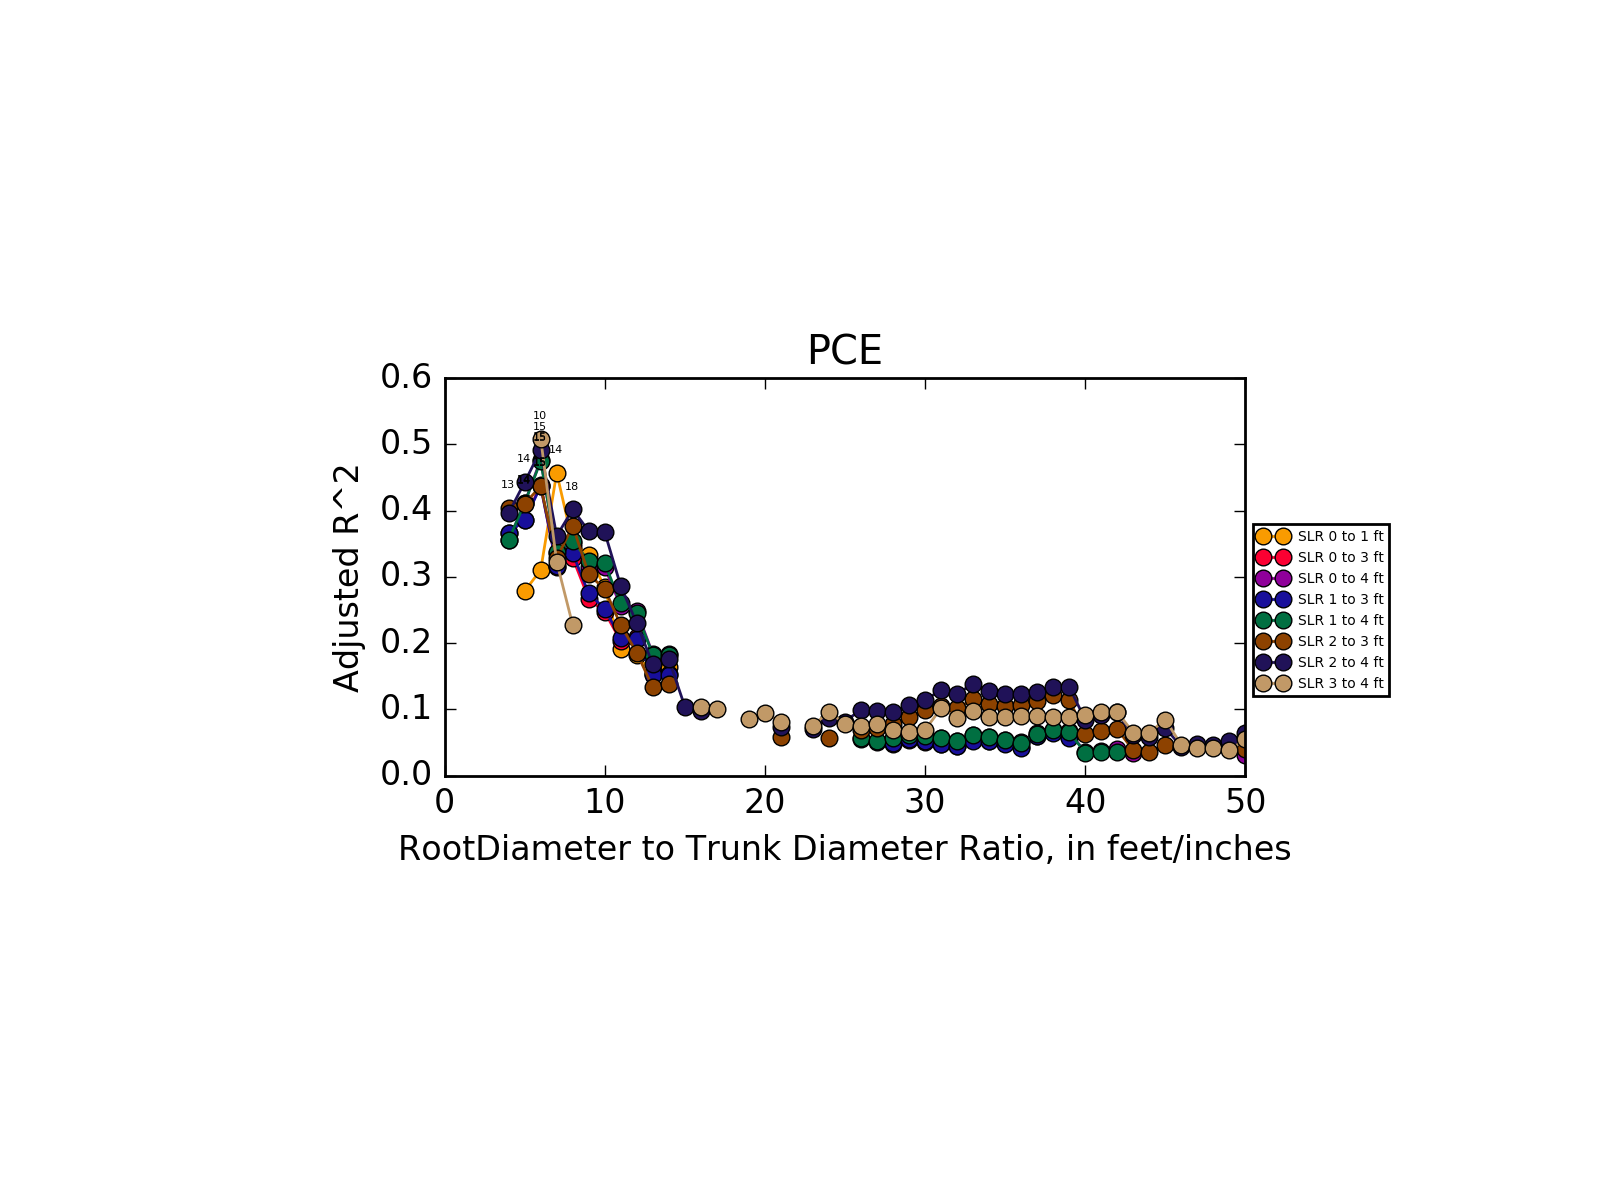

<IPython.core.display.Javascript object>


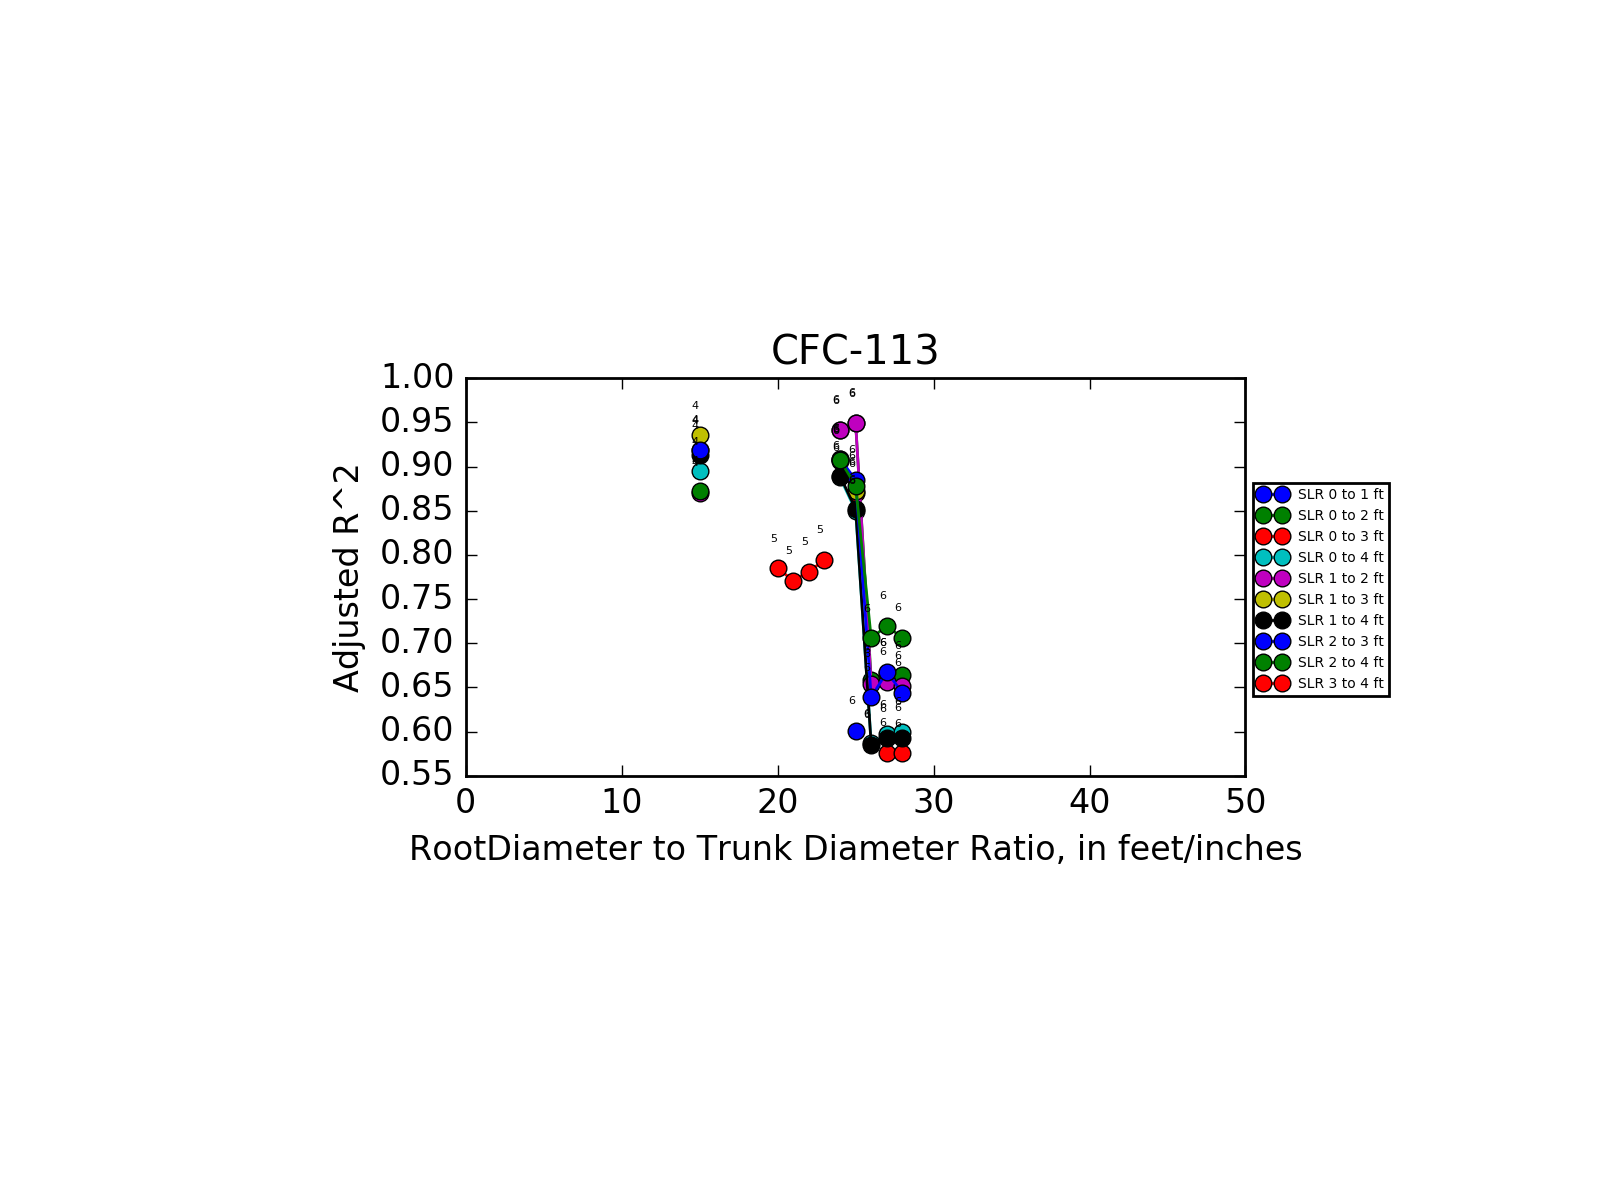

In [27]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots(dpi=200)

maxp=0.4

s=1
for i in range(0,5,1):
    for x in range(i+1,5,1):
        stats_SLR['PCE_plot_{}to{}ft'.format(i,x)]=np.nan
        stats_SLR['CFC_plot_{}to{}ft'.format(i,x)]=np.nan


        stats_SLR.loc[(stats_SLR.iloc[:,(s-1)*8+1]<0.05)&(stats_SLR.iloc[:,(s-1)*8+2]<0.05)&(stats_SLR.iloc[:,(s-1)*8+3]>3),'PCE_plot_{}to{}ft'.format(i,x)]=stats_SLR.iloc[:,(s-1)*8+0]
        stats_SLR.loc[(stats_SLR.iloc[:,(s-1)*8+5]<0.05)&(stats_SLR.iloc[:,(s-1)*8+6]<0.05)&(stats_SLR.iloc[:,(s-1)*8+7]>3),'CFC_plot_{}to{}ft'.format(i,x)]=stats_SLR.iloc[:,(s-1)*8+4]


        s+=1
z=0        
for i in range(0,5,1):
    for x in range(i+1,5,1):
        if (stats_SLR['PCE_plot_{}to{}ft'.format(i,x)].max()>maxp):
            for index, r2, n in zip(stats_SLR.index, stats_SLR['PCE_plot_{}to{}ft'.format(i,x)], stats_SLR['PCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=4)            
            slr, = ax.plot(stats_SLR['PCE_plot_{}to{}ft'.format(i,x)],'-o', label='SLR {} to {} ft'.format(i,x),color=colors[z])
#             slr, = ax.plot(stats_SLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass

plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.2),fontsize=5, ncol=1)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('RootDiameter to Trunk Diameter Ratio, in feet/inches')
plt.ylabel('Adjusted R^2')
plt.title('PCE')
plt.xlim(0,50)
# plt.ylim(0,1.1)
plt.tight_layout(pad=10)
plt.savefig("Soilgas_SLR_PCE.pdf")
    
plt.show()

z=0
fig, ax = plt.subplots(dpi=200)
for i in range(0,5,1):
    for x in range(i+1,5,1):
        if (stats_SLR['CFC_plot_{}to{}ft'.format(i,x)].max()>0):
            for index, r2, n in zip(stats_SLR.index, stats_SLR['CFC_plot_{}to{}ft'.format(i,x)], stats_SLR['CFC_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=4)            
            slr, = ax.plot(stats_SLR['CFC_plot_{}to{}ft'.format(i,x)],'-o', label='SLR {} to {} ft'.format(i,x))
#             slr, = ax.plot(stats_SLR['R2-CFC_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass


plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.2),fontsize=5, ncol=1)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('RootDiameter to Trunk Diameter Ratio, in feet/inches')
plt.ylabel('Adjusted R^2')
plt.title('CFC-113')
plt.xlim(0,50)

plt.ylim(0.55,1.0)
plt.tight_layout(pad=10)
plt.savefig("Soilgas_SLR_CFC.pdf")

plt.show()



In [ ]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots(dpi=200)

maxp=0.0

s=1
for i in range(0,5,1):
    for x in range(i+1,5,1):
        stats_MLR['PCE_plot_{}to{}ft'.format(i,x)]=np.nan
        stats_MLR['CFC_plot_{}to{}ft'.format(i,x)]=np.nan
#         stats_MLR['TCE_plot_{}to{}ft'.format(i,x)]=np.nan


        stats_MLR.loc[(stats_MLR.iloc[:,(s-1)*10+1]<0.05)&(stats_MLR.iloc[:,(s-1)*10+2]<0.05)&(stats_MLR.iloc[:,(s-1)*10+4]>3)&(stats_MLR.iloc[:,(s-1)*10+3]<0.05),'PCE_plot_{}to{}ft'.format(i,x)]=stats_MLR.iloc[:,(s-1)*10+0]
        stats_MLR.loc[(stats_MLR.iloc[:,(s-1)*10+6]<0.05)&(stats_MLR.iloc[:,(s-1)*10+7]<0.05)&(stats_MLR.iloc[:,(s-1)*10+9]>3)&(stats_MLR.iloc[:,(s-1)*10+8]<0.05),'CFC_plot_{}to{}ft'.format(i,x)]=stats_MLR.iloc[:,(s-1)*10+5]
#         stats_MLR.loc[(stats_MLR.iloc[:,(s-1)*10+11]<0.05)&(stats_MLR.iloc[:,(s-1)*10+12]<0.05)&(stats_MLR.iloc[:,(s-1)*10+11]>3)&(stats_MLR.iloc[:,(s-1)*10+13]<0.05),'TCE_plot_{}to{}ft'.format(i,x)]=stats_MLR.iloc[:,(s-1)*10+10]

        s+=1
z=0        
for i in range(0,5,1):
    for x in range(i+1,5,1):
        if (stats_MLR['PCE_plot_{}to{}ft'.format(i,x)].max()>maxp):
            for index, r2, n in zip(stats_MLR.index, stats_MLR['PCE_plot_{}to{}ft'.format(i,x)], stats_MLR['PCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=4)            
            slr, = ax.plot(stats_MLR['PCE_plot_{}to{}ft'.format(i,x)],'-o', label='MLR {} to {} ft'.format(i,x))
#             slr, = ax.plot(stats_MLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass

plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.2),fontsize=5, ncol=1)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.title('PCE')
plt.xlim(0,50)
plt.ylim(0,1.1)
plt.tight_layout(pad=10)
plt.savefig("Soilgas_MLR_PCE.pdf")
    
plt.show()

fig, ax = plt.subplots(dpi=200)

z=0
for i in range(0,5,1):
    for x in range(i+1,5,1):
        if (stats_MLR['CFC_plot_{}to{}ft'.format(i,x)].max()>0):
            for index, r2, n in zip(stats_SLR.index, stats_SLR['PCE_plot_{}to{}ft'.format(i,x)], stats_SLR['PCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=4)            
            slr, = ax.plot(stats_MLR['CFC_plot_{}to{}ft'.format(i,x)],'-o', label='MLR {} to {} ft'.format(i,x))
#             slr, = ax.plot(stats_MLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass

plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.2),fontsize=5, ncol=1)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.xlim(0,50)
plt.title('CFC-113')
plt.ylim(0,1.1)
plt.tight_layout(pad=10)
plt.savefig("Soilgas_MLR_CFC.pdf")
    
plt.show()
